In [1]:
import os
import os.path as op
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
files = [op.join('../data/graphs', dirs, fls)
         for dirs in ["BNU1", "BNU3", "HNU1"]
         for fls in os.listdir('../data/graphs/'+dirs)]

In [3]:
adjs = np.zeros((6, 6, len(files)))
nodelist = ['1', '3', '2', '5', '4', '6']
for idx, fname in enumerate(files):
    graph = nx.read_weighted_edgelist(fname)
    tmp = nx.adj_matrix(graph, nodelist=nodelist).todense()
    adjs[:, :, idx] = tmp

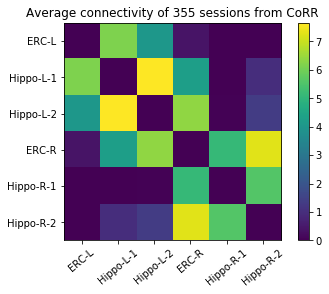

In [4]:
plt.imshow(np.log(np.mean(adjs, axis=2)+1))
labs = ['ERC-L', 'Hippo-L-1', 'Hippo-L-2',
        'ERC-R', 'Hippo-R-1', 'Hippo-R-2']
plt.xticks(np.arange(0, 6), labs, rotation=40)
plt.yticks(np.arange(0, 6), labs)
plt.title('Average connectivity of {} sessions from CoRR'.format(len(files)))
plt.colorbar()
plt.show()

In [5]:
np.save('../data/connection_matrix', adjs, allow_pickle=False)